In [39]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 

In [40]:
for dirname, _, filenames in os.walk('/kaggle/input'): #Ingresar la direccion de donde se encuentre el documento
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [41]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [42]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') 
    df = df[[col for col in df if df[col].nunique() > 1]] 
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Matriz de Correlacion Matrix de {filename}', fontsize=15)
    plt.show()


In [43]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) 
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] 
    columnNames = list(df)
    if len(columnNames) > 10: 
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [44]:
nRowsRead = 1000 
df1 = pd.read_csv('/home/alberto/Documentos/UAX/Curso 3/Desarrollo Orientado a Objetos/kaggle/input/Not_so_Markov_action_board_S100E1000.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Not_so_Markov_action_board_S100E1000.csv'
nRow, nCol = df1.shape
print(f'Hay {nRow} filas y {nCol} columnas')

There are 1000 rows and 7 columns


In [45]:
Probabilidades=np.array([1/3., 1/3., 1/3.])

In [46]:
df1.head(5)

,Unnamed: 0,season,episode,Markov Action,Nash Action,Markov Reward,Nash Reward
0,0,0.0,1.0,0.0,2.0,1.0,-1.0
1,1,0.0,2.0,1.0,0.0,2.0,-2.0
2,2,0.0,3.0,2.0,1.0,3.0,-3.0
3,3,0.0,4.0,1.0,0.0,4.0,-4.0
4,4,0.0,5.0,1.0,1.0,4.0,-4.0


In [47]:
df1.tail(15)

,Unnamed: 0,season,episode,Markov Action,Nash Action,Markov Reward,Nash Reward
985,985,0.0,986.0,2.0,2.0,-4.0,4.0
986,986,0.0,987.0,2.0,0.0,-5.0,5.0
987,987,0.0,988.0,2.0,0.0,-6.0,6.0
988,988,0.0,989.0,1.0,2.0,-7.0,7.0
989,989,0.0,990.0,2.0,0.0,-8.0,8.0
990,990,0.0,991.0,1.0,2.0,-9.0,9.0
991,991,1.0,1.0,1.0,0.0,1.0,-1.0
992,992,1.0,2.0,0.0,1.0,0.0,0.0
993,993,1.0,3.0,2.0,2.0,0.0,0.0
994,994,1.0,4.0,2.0,0.0,-1.0,1.0


In [48]:
df1.drop(['season','episode'], axis=1,inplace=True)

In [49]:
df1.columns=['Tirada','Movimiento de Markov','Movimiento de Nash','Resultado de Markov','Resultado de Nash']

<ipython-input-41-0121bf3d9d74>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


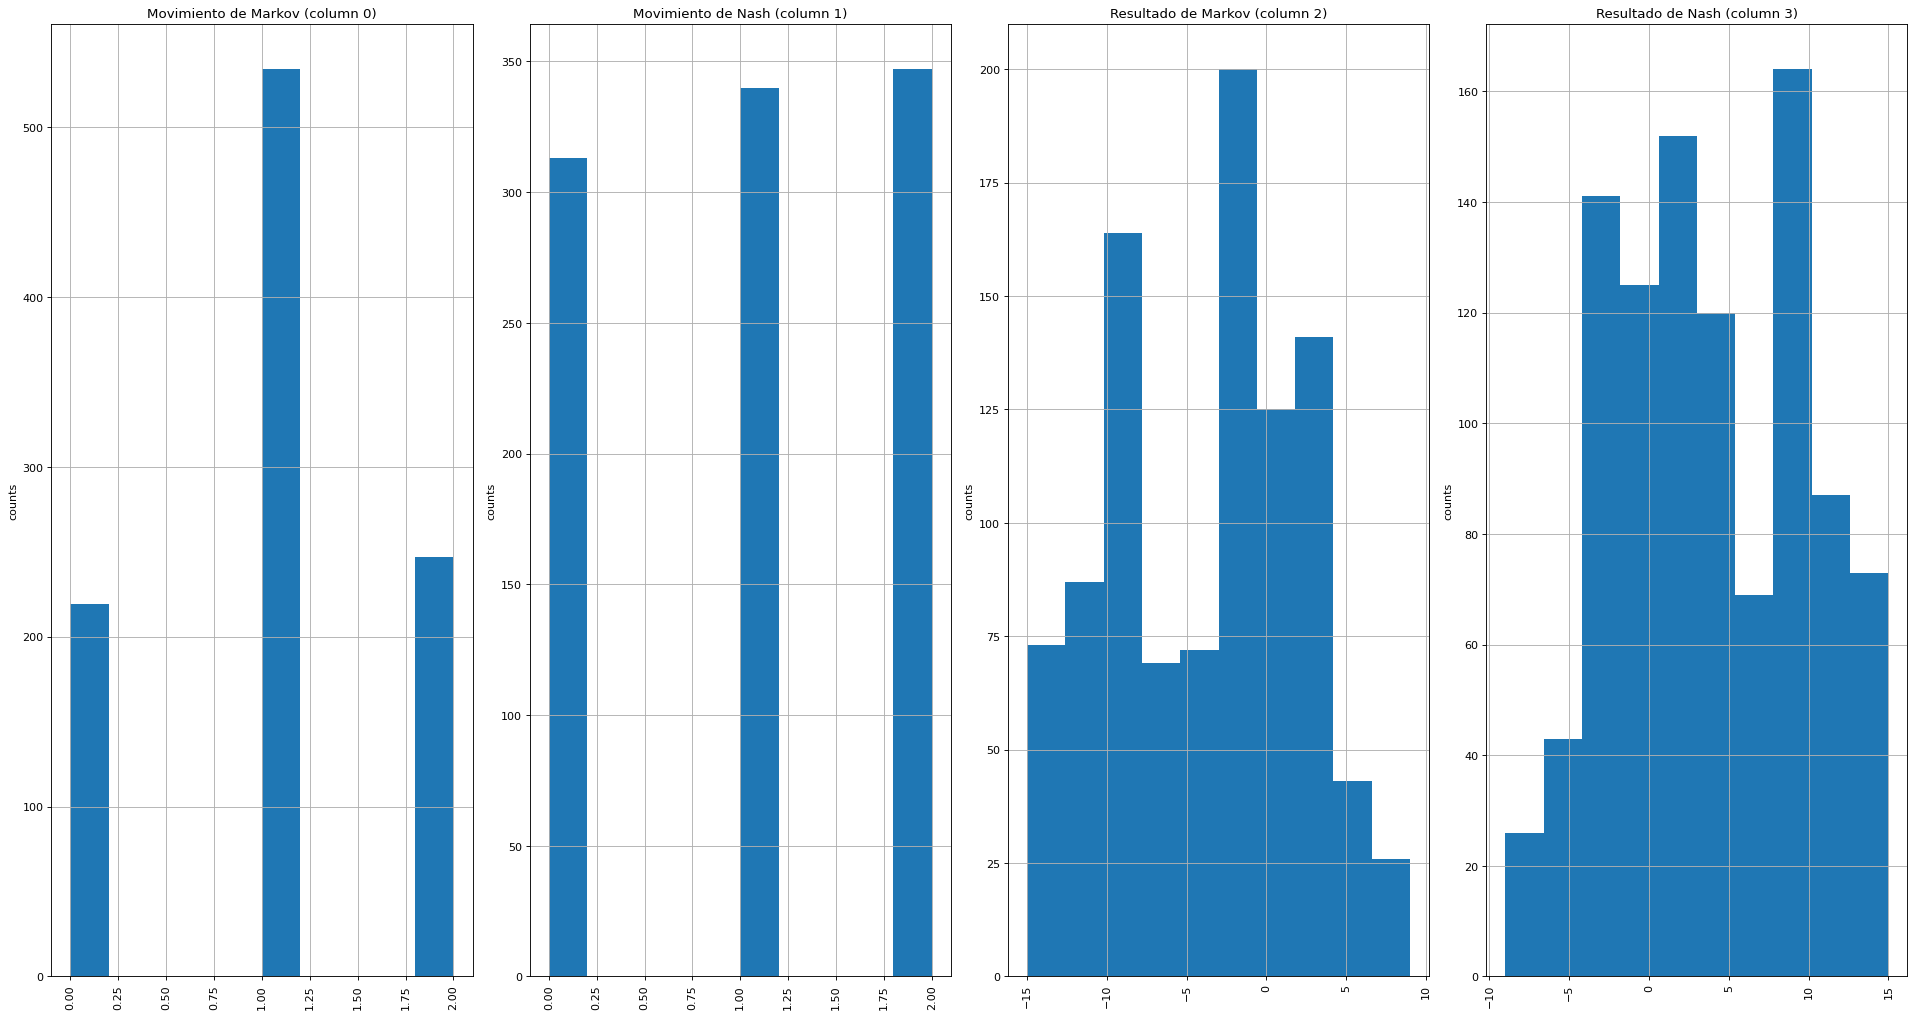

In [50]:
plotPerColumnDistribution(df1, 10, 5)

<ipython-input-42-a0343c621274>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


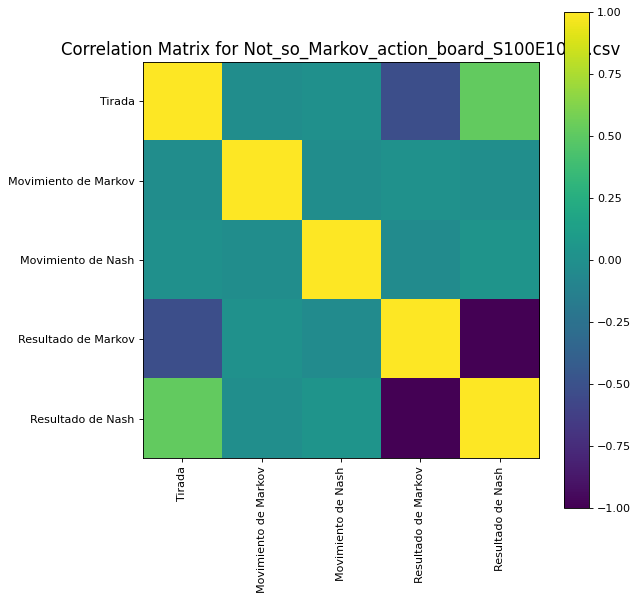

In [51]:
plotCorrelationMatrix(df1, 8)

<ipython-input-43-45d7bdcfca59>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


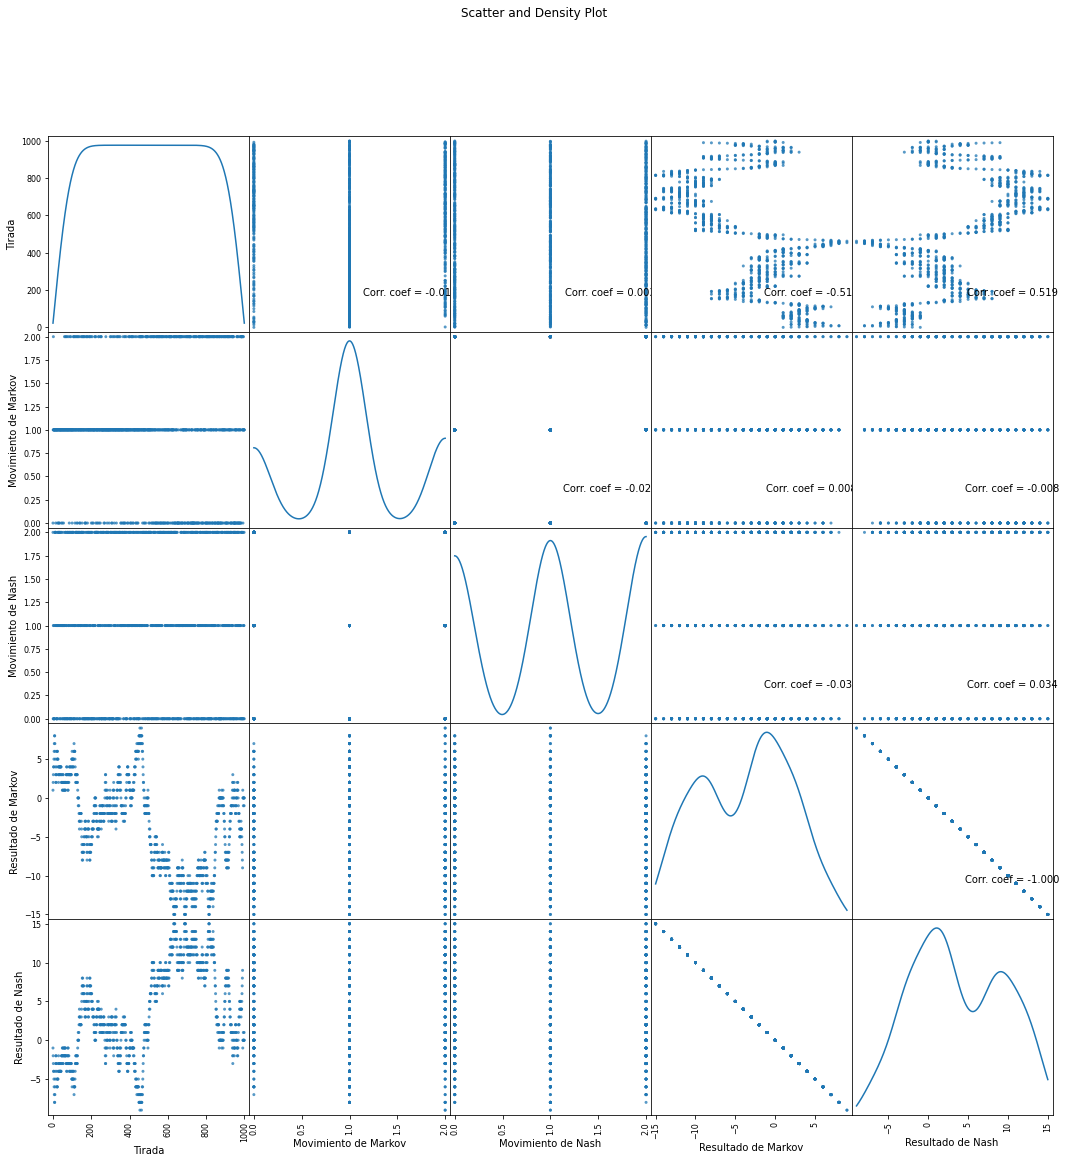

In [52]:
plotScatterMatrix(df1, 18, 10)

In [53]:
df1['Movimiento de Markov'].value_counts()

1.0    534
2.0    247
0.0    219
Name: Movimiento de Markov, dtype: int64

In [54]:
df1['Movimiento de Nash'].value_counts()

2.0    347
1.0    340
0.0    313
Name: Movimiento de Nash, dtype: int64

In [55]:
piedra=df1['Movimiento de Markov'].value_counts()[0]+df1['Movimiento de Nash'].value_counts()[0]
papel=df1['Movimiento de Markov'].value_counts()[1]+df1['Movimiento de Nash'].value_counts()[1]
tijeras=df1['Movimiento de Markov'].value_counts()[2]+df1['Movimiento de Nash'].value_counts()[2]

In [56]:
print(piedra)
print(papel)
print(tijeras)

532
874
594


In [57]:
Ppiedra=[0,0,0]
Ppapel=[0,0,0]
Ptijeras=[0,0,0]

In [59]:
for i in df1.index:
    if i+1==len(df1.index):
        break
    else:
        if df1['Movimiento de Markov'][i]==0.0:
            if df1['Movimiento de Markov'][i+1]==0.0:
                Ppiedra[0]+=1
            elif df1['Movimiento de Markov'][i+1]==1.0:
                Ppiedra[1]+=1
            elif df1['Movimiento de Markov'][i+1]==2.0:
                Ppiedra[2]+=1
        elif df1['Movimiento de Markov'][i]==1.0:
            if df1['Movimiento de Markov'][i+1]==0.0:
                Ppapel[0]+=1
            elif df1['Movimiento de Markov'][i+1]==1.0:
                Ppapel[1]+=1
            elif df1['Movimiento de Markov'][i+1]==2.0:
                Ppapel[2]+=1
        elif df1['Movimiento de Markov'][i]==2.0:
            if df1['Movimiento de Markov'][i+1]==0.0:
                Ptijeras[0]+=1
            elif df1['Movimiento de Markov'][i+1]==1.0:
                Ptijeras[1]+=1
            elif df1['Movimiento de Markov'][i+1]==2.0:
                Ptijeras[2]+=1
        if df1['Movimiento de Nash'][i]==0.0:
            if df1['Movimiento de Nash'][i+1]==0.0:
                Ppiedra[0]+=1
            elif df1['Movimiento de Nash'][i+1]==1.0:
                Ppiedra[1]+=1
            elif df1['Movimiento de Nash'][i+1]==2.0:
                Ppiedra[2]+=1
        elif df1['Movimiento de Nash'][i]==1.0:
            if df1['Movimiento de Nash'][i+1]==0.0:
                Ppapel[0]+=1
            elif df1['Movimiento de Nash'][i+1]==1.0:
                Ppapel[1]+=1
            elif df1['Movimiento de Nash'][i+1]==2.0:
                Ppapel[2]+=1
        elif df1['Movimiento de Nash'][i]==2.0:
            if df1['Movimiento de Nash'][i+1]==0.0:
                Ptijeras[0]+=1
            elif df1['Movimiento de Nash'][i+1]==1.0:
                Ptijeras[1]+=1
            elif df1['Movimiento de Nash'][i+1]==2.0:
                Ptijeras[2]+=1

In [60]:
Ppiedra

[134, 210, 187]

Inmediatamente después de piedra vienen 134 piedras, 210 papeles, 187 tijeras

In [61]:
Ppapel

[218, 417, 238]

In [62]:
Ptijeras

[179, 247, 168]

In [63]:
def porcentaje(funcion):
    funcione=[0,0,0]
    total=funcion[0]+funcion[1]+funcion[2]
    funcione[0]=round(funcion[0]/total,2)
    funcione[1]=round(funcion[1]/total,2)
    funcione[2]=round(funcion[2]/total,2)
    return funcione
    

In [64]:
Ppiedra=porcentaje(Ppiedra)

In [65]:
Ppapel=porcentaje(Ppapel)

In [66]:
Ptijeras=porcentaje(Ptijeras)

In [67]:
Ppiedra

[0.25, 0.4, 0.35]

In [68]:
Ppapel

[0.25, 0.48, 0.27]

In [69]:
Ptijeras

[0.3, 0.42, 0.28]

In [71]:
ProbabilidadesSegunda=np.array([Ppiedra,Ppapel,Ptijeras])

In [72]:
ProbabilidadesSegunda

array([[0.25, 0.4 , 0.35],
       [0.25, 0.48, 0.27],
       [0.3 , 0.42, 0.28]])

In [76]:
ProbabilidadFinal=Probabilidades @ ProbabilidadesSegunda

In [77]:
p

array([0.26666667, 0.43333333, 0.3       ])